In [5]:
import matplotlib.pyplot as plt
import tensorflow.keras.losses as losses
import numpy as np
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

## UPAE

In [1]:
#run UPAE
%run main.py --u

/home/cara/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-05-11 00:10:56.296491: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-11 00:10:56.355272: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-11 00:10:56.356398: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-11 00:10:57.464691: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Shuffling Dataset

Splitting Dataset

Processing training images



100%|██████████| 624/624 [00:09<00:00, 68.80it/s]



Processing validation images




100%|██████████| 78/78 [00:01<00:00, 68.98it/s]




Processing testing images



100%|██████████| 858/858 [00:12<00:00, 71.10it/s]




Training AE model


2023-05-11 00:11:23.917635: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Decoder
Epoch 1/10
UPAE Training
UPAE Training
 6/10 [=================>............] - ETA: 9s - total_loss: : 7185.9940 - loss1: : 7185.9821 - loss2: : 0.0118 - binary_crossentropy: : 2666109.1667 - accuracy: : 1.0544e-04  

### Validation

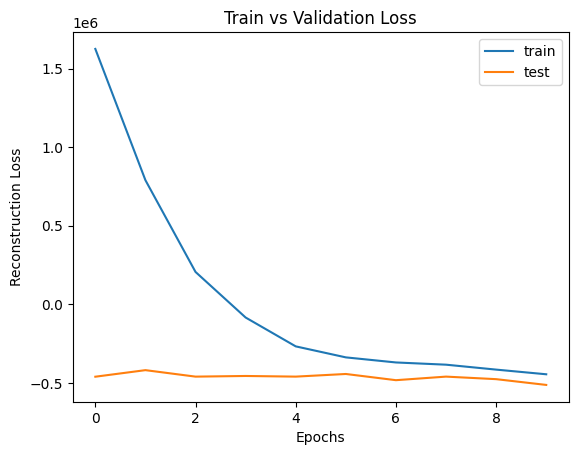

In [4]:

train_loss = history_train.history['binary_crossentropy: ']
valid_loss = history_valid.history['binary_crossentropy: ']

pyplot.plot(train_loss , label='train')
pyplot.plot(valid_loss , label='test')
pyplot.title('Train vs Validation Loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Reconstruction Loss')
pyplot.legend()
pyplot.show()


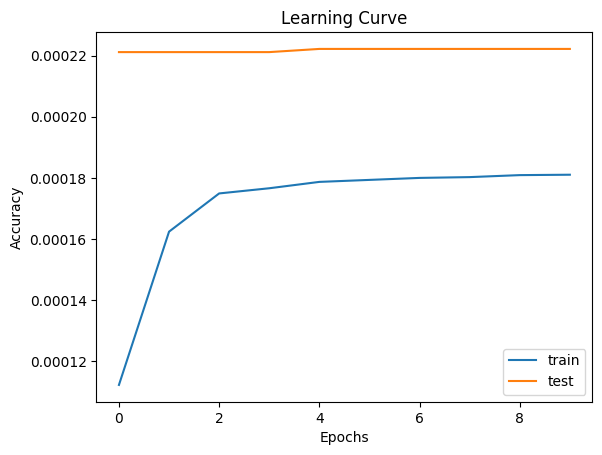

In [5]:
train_loss = history_train.history['accuracy: ']
valid_loss = history_valid.history['accuracy: ']

pyplot.plot(train_loss , label='train')
pyplot.plot(valid_loss , label='test')
pyplot.title('Learning Curve')
pyplot.xlabel('Epochs')
pyplot.ylabel('Accuracy')
pyplot.legend()
pyplot.show()

### Testing

In [6]:
#testing using testing set
input_images= image_datasets[2] 
generated = model.predict(input_images)
generated = np.array(generated)

2023-05-10 22:58:50.070237: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 224919552 exceeds 10% of free system memory.
2023-05-10 22:58:50.280305: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 224919552 exceeds 10% of free system memory.
2023-05-10 22:58:50.388900: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 224919552 exceeds 10% of free system memory.
2023-05-10 22:58:50.503724: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 224919552 exceeds 10% of free system memory.
2023-05-10 22:58:50.607550: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 112459776 exceeds 10% of free system memory.


In [7]:
#getting mean reconstruction error score for the images tested
re_score = losses.mean_squared_error(input_images, generated)
re_score = np.mean(re_score)
print("reconstruction error score:", re_score)

reconstruction error score: 7834.403


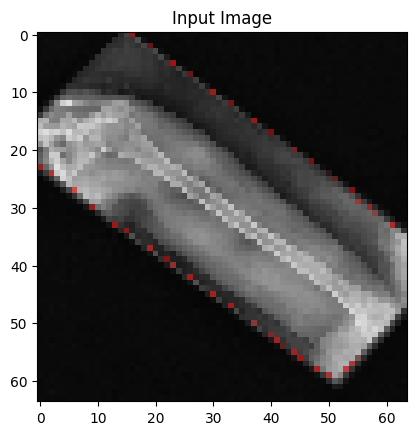

In [8]:
#input image
plt.imshow(image_datasets[2][4])
plt.title("Input Image")
plt.show()

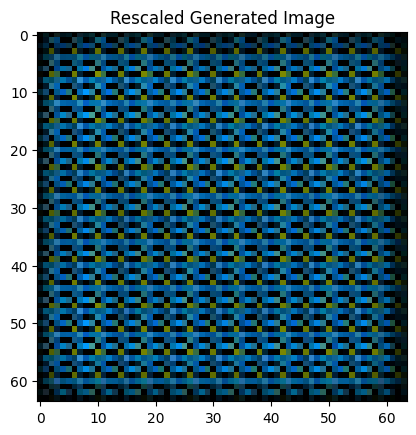

In [11]:
#rescaled generated image
generated_rescaled = (generated[0] - generated[0].min()) / (generated[0].max() - generated[0].min())
plt.imshow(generated_rescaled.reshape(64,64,3))
plt.title("Rescaled Generated Image")
plt.show()

NameError: name 'main' is not defined

## Vanilla AE

In [3]:
%run main.py 

Shuffling Dataset

Splitting Dataset

Processing training images



100%|██████████| 624/624 [00:11<00:00, 54.68it/s]




Processing validation images



100%|██████████| 78/78 [00:01<00:00, 54.24it/s]




Processing testing images



100%|██████████| 858/858 [00:16<00:00, 50.98it/s]




Training AE model
Decoder
Epoch 1/10
Vanilla Loss
Vanilla Loss
10/10 [==============================] - 32s 3s/step - mse_loss: 7652.8749 - binary_crossentropy: : 848889.7571
Epoch 2/10
10/10 [==============================] - 24s 2s/step - mse_loss: 7137.7557 - binary_crossentropy: : 1944507.5341
Epoch 3/10
10/10 [==============================] - 30s 3s/step - mse_loss: 6768.7519 - binary_crossentropy: : 1678900.9545
Epoch 4/10
10/10 [==============================] - 25s 2s/step - mse_loss: 6587.3602 - binary_crossentropy: : 71047.2282
Epoch 5/10
10/10 [==============================] - 22s 2s/step - mse_loss: 6515.4354 - binary_crossentropy: : 27396.1581
Epoch 6/10
10/10 [==============================] - 22s 2s/step - mse_loss: 6351.0164 - binary_crossentropy: : 47997.5529
Epoch 7/10
10/10 [==============================] - 22s 2s/step - mse_loss: 6358.0142 - binary_crossentropy: : -52769.1143
Epoch 8/10
10/10 [==============================] - 26s 3s/step - mse_loss: 6015.8400 

### Validation VAE

In [4]:

train_loss = history_train.history['binary_crossentropy: ']
valid_loss = history_valid.history['binary_crossentropy: ']

pyplot.plot(train_loss , label='train')
pyplot.plot(valid_loss , label='test')
pyplot.title('Train vs Validation Loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Reconstruction Loss')
pyplot.legend()
pyplot.show()


NameError: name 'pyplot' is not defined

In [ ]:
train_loss = history_train.history['accuracy: ']
valid_loss = history_valid.history['accuracy: ']

pyplot.plot(train_loss , label='train')
pyplot.plot(valid_loss , label='test')
pyplot.title('Learning Curve')
pyplot.xlabel('Epochs')
pyplot.ylabel('Accuracy')
pyplot.legend()
pyplot.show()

### Testing VAE

In [ ]:
#testing using testing set
input_images= image_datasets[2] 
generated = model.predict(input_images)
generated = np.array(generated)

In [ ]:
#getting mean reconstruction error score for the images tested
re_score = losses.mean_squared_error(input_images, generated)
re_score = np.mean(re_score)
print("reconstruction error score:", re_score)

In [ ]:
#input image
plt.imshow(image_datasets[2][4])
plt.title("Input Image")
plt.show()